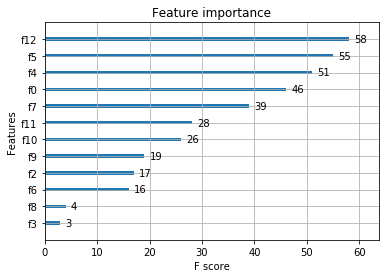

In [4]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
 
# 加载数据集,此数据集时做回归的
boston = load_boston()
X,y = boston.data,boston.target
 
# Xgboost训练过程
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
 
# 算法参数
params = {
    'booster':'gbtree',
    'objective':'reg:gamma',
    'gamma':0.1,
    'max_depth':5,
    'lambda':3,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'slient':1,
    'eta':0.1,
    'seed':1000,
    'nthread':4,
    'verbose_eval':True
}
 
dtrain = xgb.DMatrix(X_train,y_train)
num_rounds = 300
plst = params.items()
model = xgb.train(plst,dtrain,num_rounds)
 
# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)
 
# 显示重要特征
plot_importance(model)
plt.show()